Загрузим файлы и проверим их на типы данных, дубли и пропущенные значения

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [49]:
purchase = pd.read_csv('C:/Users/majkl/WorkSpace/Project_8/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('C:/Users/majkl/WorkSpace/Project_8/QVI_transaction_data.xlsx')

In [ ]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase.loc[purchase.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [ ]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [50]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Меняем формат колонки DATE на соотвествующий

In [51]:
from datetime import date, timedelta
start = date(1899, 12, 30)
new_date_format = []
for date in transaction["DATE"]:
  delta = timedelta(date)
  new_date_format.append(start + delta)

In [52]:
#меняем тип данных
transaction["DATE"] = pd.to_datetime(pd.Series(new_date_format))

In [53]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [54]:
transaction.loc[transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [9]:
transaction = transaction.drop_duplicates()

In [10]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Создаем новую таблицу с необходимыми нам данными из представленных двух

In [55]:
merged_df = pd.merge(purchase, transaction, on = 'LYLTY_CARD_NBR', how = 'right')
merged_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264831,272319,YOUNG SINGLES/COUPLES,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,272358,YOUNG SINGLES/COUPLES,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,272379,YOUNG SINGLES/COUPLES,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8
264834,272379,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME         264836 non-null  object        
 8   PROD_QTY          264836 non-null  int64         
 9   TOT_SALES         264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


Изучить названия продукта

In [12]:
merged_df["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [25]:
PROD_NAME = merged_df["PROD_NAME"].str.replace(r'([0-9]+[g])','') \
    .str.replace(r'[^\w]',' ') \
    .str.replace(r'175g',' ') \
    .str.replace(r'150g',' ') \
    .str.replace(r'&',' ') \
    .str.split().explode()

PROD_NAME.value_counts()

PROD_NAME
Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Name: count, Length: 220, dtype: int64

Уберем строки с продукцией Salsa, так как нам нужно проанализировать чипсы

In [56]:
merged_df = merged_df[~merged_df['PROD_NAME'].str.contains('salsa', case=False, na=False)]
merged_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264831,272319,YOUNG SINGLES/COUPLES,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,272358,YOUNG SINGLES/COUPLES,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,272379,YOUNG SINGLES/COUPLES,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8
264834,272379,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [31]:
merged_df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467410e+05,246741,246741.000000,2.467410e+05,246741.000000,246741.000000,246741.000000
mean,1.355311e+05,1970-01-01 00:00:00.000043464,135.051212,1.351312e+05,56.351835,1.908061,7.321328
min,1.000000e+03,1970-01-01 00:00:00.000043282,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,1970-01-01 00:00:00.000043373,70.000000,6.756900e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,1970-01-01 00:00:00.000043464,130.000000,1.351840e+05,53.000000,2.000000,7.400000
75%,2.030840e+05,1970-01-01 00:00:00.000043555,203.000000,2.026540e+05,87.000000,2.000000,8.800000
max,2.373711e+06,1970-01-01 00:00:00.000043646,272.000000,2.415841e+06,114.000000,200.000000,650.000000
std,8.071542e+04,NaN,76.787231,7.814786e+04,33.695488,0.659832,3.077833


In [57]:
merged_df.sort_values('PROD_QTY', ascending= False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,46296,RETIREES,Budget,2019-05-15,46,42138,81,Pringles Original Crisps 134g,5,18.5
69523,71142,OLDER FAMILIES,Premium,2019-05-15,71,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,55144,OLDER FAMILIES,Premium,2018-08-18,55,49328,44,Thins Chips Light& Tangy 175g,5,16.5


Найдены нестандартные данные на покупка за раз 200 упаковок одним и темже покупателем, проверим все его покупки

In [58]:
merged_df.loc[merged_df['LYLTY_CARD_NBR'] == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [59]:
not_loyl = merged_df.loc[merged_df['LYLTY_CARD_NBR'] == 226000].index
merged_df.drop(not_loyl)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264831,272319,YOUNG SINGLES/COUPLES,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,272358,YOUNG SINGLES/COUPLES,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,272379,YOUNG SINGLES/COUPLES,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8
264834,272379,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [60]:
merged_df.sort_values('LYLTY_CARD_NBR')


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
238495,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
185543,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
185542,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
99838,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
15676,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0
215522,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
227371,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
53106,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4


In [69]:
date_count = merged_df.groupby('DATE').agg({'TXN_ID': 'count'}).sort_values('DATE').rename(columns={'TXN_ID': 'count'})
date_count

,count
DATE,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660
...,...
2019-06-26,657
2019-06-27,669
2019-06-28,673


In [75]:
print(f'Отсуствующий день: {pd.date_range(start=merged_df["DATE"].min(), end=merged_df["DATE"].max()).difference(merged_df["DATE"])[0]}')

Отсуствующий день: 2018-12-25 00:00:00


Днем, в который не было произведено ни одной транзакции, является Рождество, когда магазин закрыт. Так что в этом нет ничего необычного.

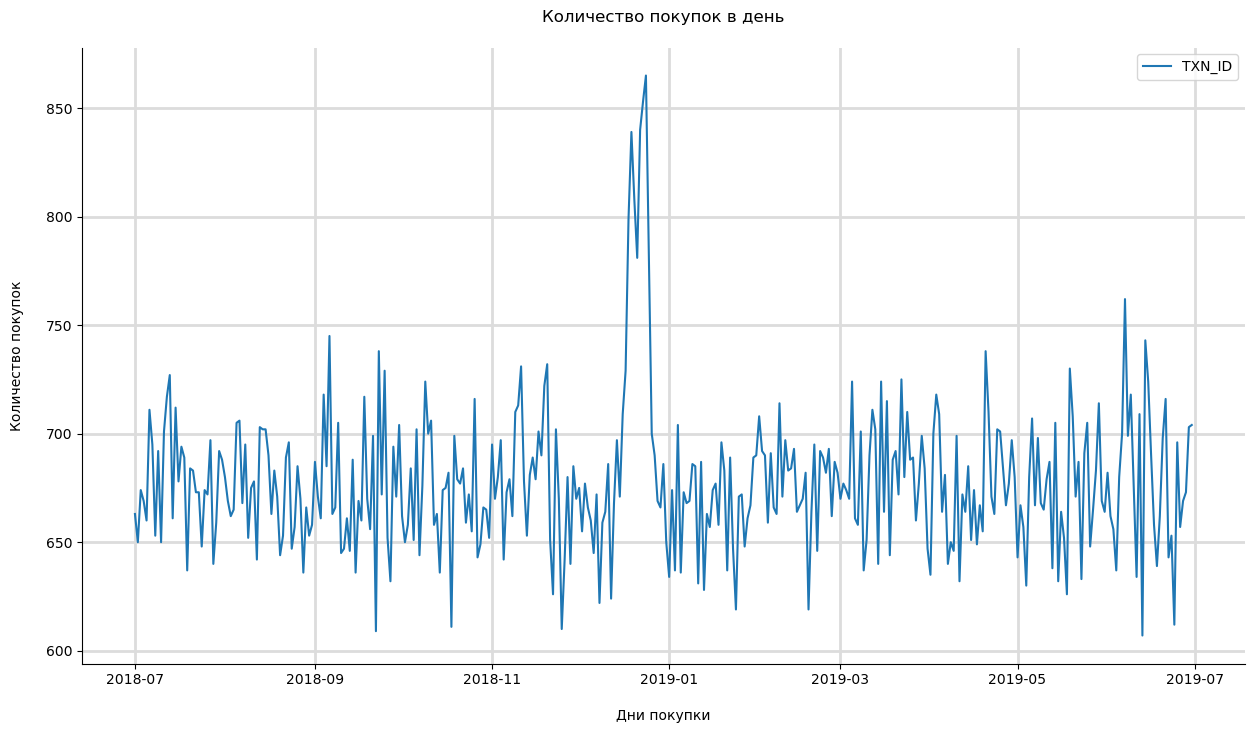

In [65]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=date_count, ax=ax)
ax.set_title('Количество покупок в день\n')
ax.set_ylabel('Количество покупок\n')
ax.set_xlabel('\nДни покупки')
plt.grid(color='gainsboro', linestyle='-', linewidth=2)
sns.despine()
plt.show() 

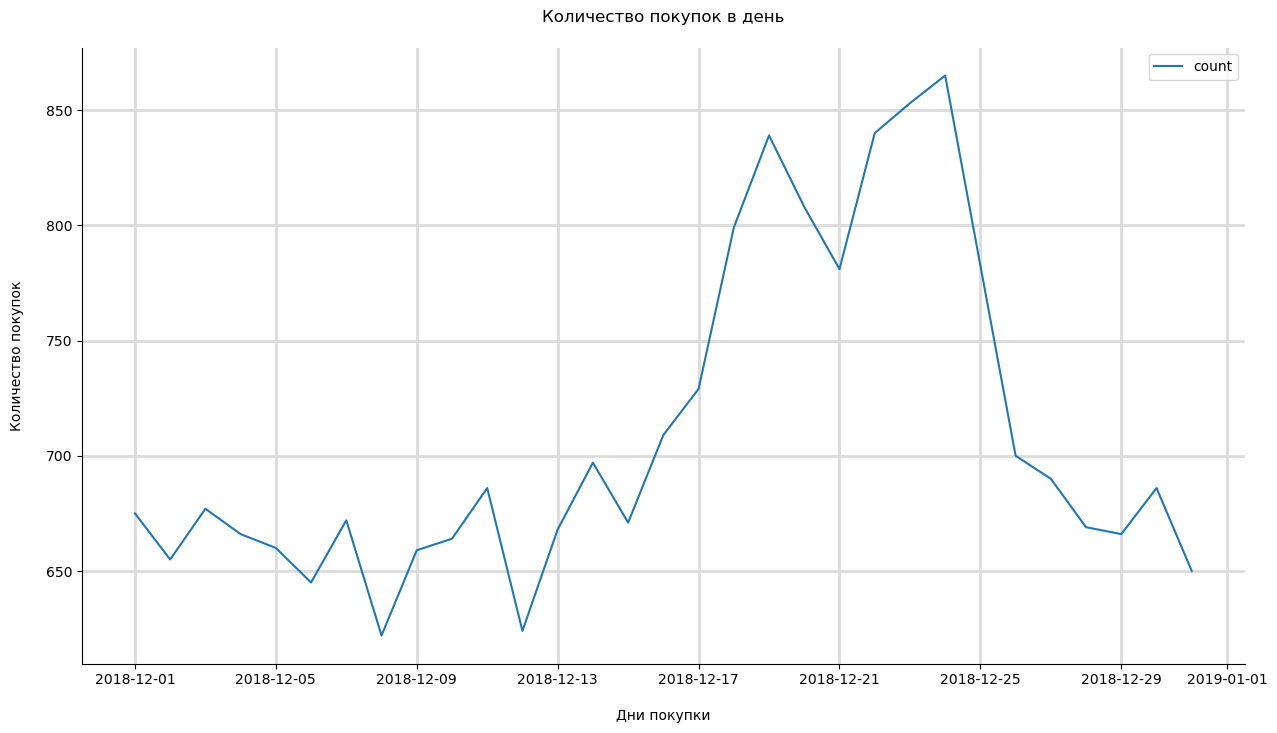

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=date_count.query('DATE >= "2018-12-01" and DATE <= "2018-12-31"'), ax=ax)
ax.set_title('Количество покупок в день\n')
ax.set_ylabel('Количество покупок\n')
ax.set_xlabel('\nДни покупки')
plt.grid(color='gainsboro', linestyle='-', linewidth=2)
sns.despine()
plt.show() 

Мы видим, что рост продаж происходит в преддверии Рождества и что есть ноль продаж в Рождественский день. Это связано с магазинами закрываются на
Рождество.

Иследуем размеры упаковки

C:\Users\majkl\AppData\Local\Temp\ipykernel_27688\906833305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["PROD_NAME"] = merged_df["PROD_NAME"].str.replace(r'[0-9]+(G)','g')


<Axes: ylabel='Frequency'>

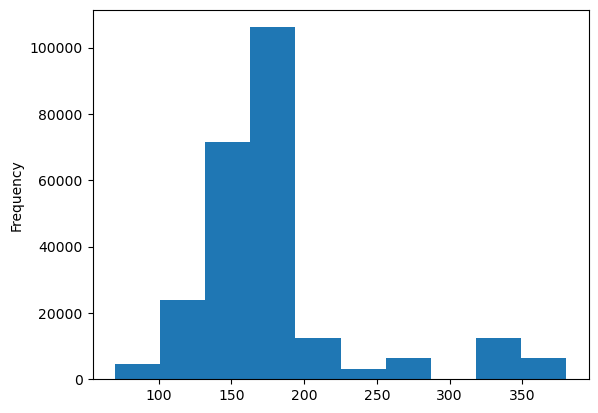

In [83]:
merged_df["PROD_NAME"] = merged_df["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = merged_df["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").str.replace("G","").astype("float")

pack_sizes.plot.hist()

Иследуем бренды

In [86]:
merged_df['brand_name'] = merged_df.PROD_NAME.apply(lambda x: x.split(' ')[0])
merged_df

C:\Users\majkl\AppData\Local\Temp\ipykernel_27688\1204368189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['brand_name'] = merged_df.PROD_NAME.apply(lambda x: x.split(' ')[0])


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,brand_name
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...,...,...
264831,272319,YOUNG SINGLES/COUPLES,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,272358,YOUNG SINGLES/COUPLES,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,272379,YOUNG SINGLES/COUPLES,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,272379,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


Некоторые торговые марки выглядят так, как будто они принадлежат к одному и тому же бренду, например, RED и
RRD, которые являются чипсами Red Rock Deli. Объединим их вместе

In [88]:
merged_df["Cleaned_Brand_Names"] = merged_df["PROD_NAME"].str.split().str[0]

C:\Users\majkl\AppData\Local\Temp\ipykernel_27688\4159005793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Cleaned_Brand_Names"] = merged_df["PROD_NAME"].str.split().str[0]


In [89]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [90]:
merged_df["Cleaned_Brand_Names"] = merged_df.apply(lambda line: clean_brand_names(line), axis=1)

C:\Users\majkl\AppData\Local\Temp\ipykernel_27688\2959494453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Cleaned_Brand_Names"] = merged_df.apply(lambda line: clean_brand_names(line), axis=1)


In [94]:
merged_df["Cleaned_Brand_Names"].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

<Axes: ylabel='Cleaned_Brand_Names'>

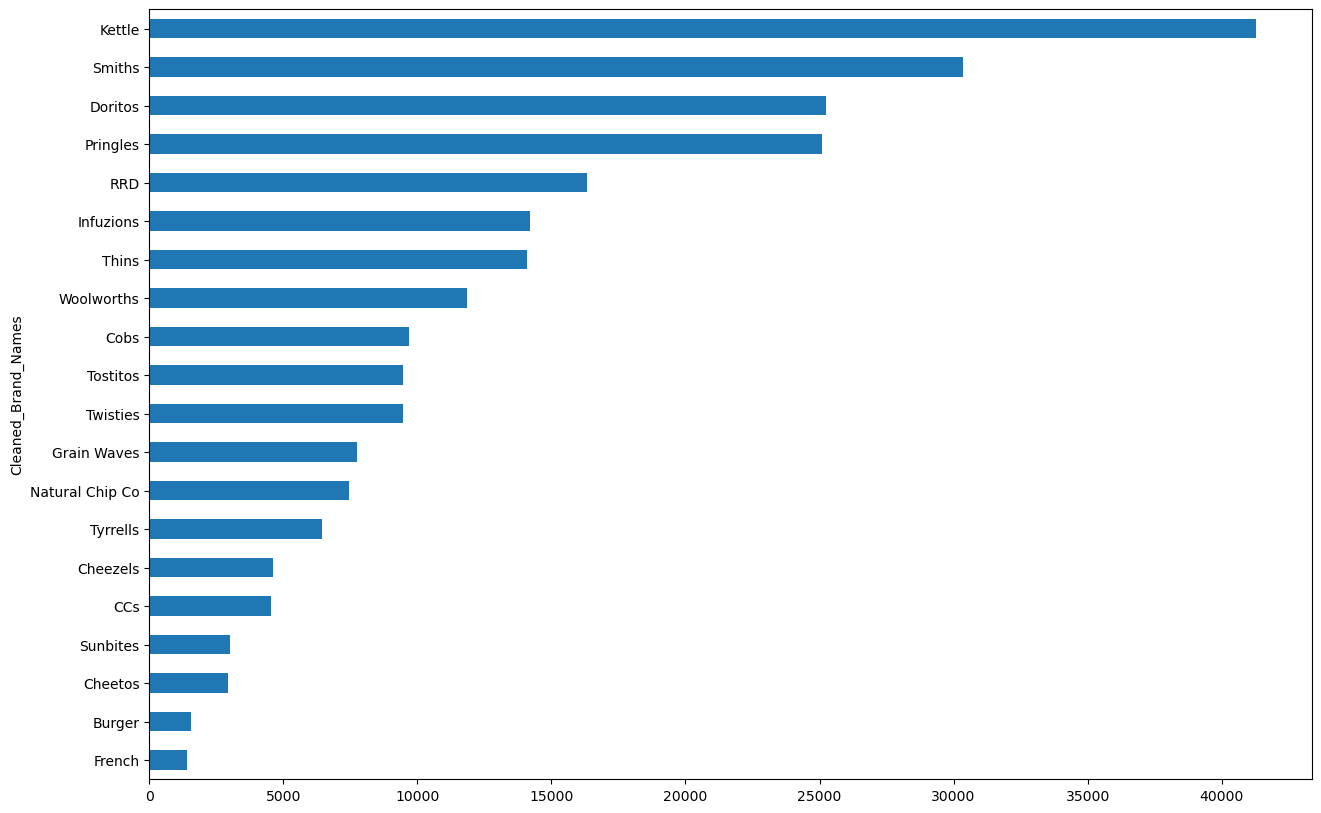

In [95]:
merged_df["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(15,10))

In [96]:
merged_df.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
brand_name             0
Cleaned_Brand_Names    0
dtype: int64

In [97]:
merged_df.to_csv('C:/Users/majkl/WorkSpace/Project_8/QVI_data.csv')

Анализ данных по сегментам клиентов

Сделаем расчет общего объема продаж по категориям LIFESTAGE и PREMIUM_CUSTOMER и
построим график распределения по этим сегментам, чтобы описать, какой потребительский сегмент вносит
наибольший вклад в продажи чипсов.

In [100]:
grouped_sales = pd.DataFrame(merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            76542.60  7.356329
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

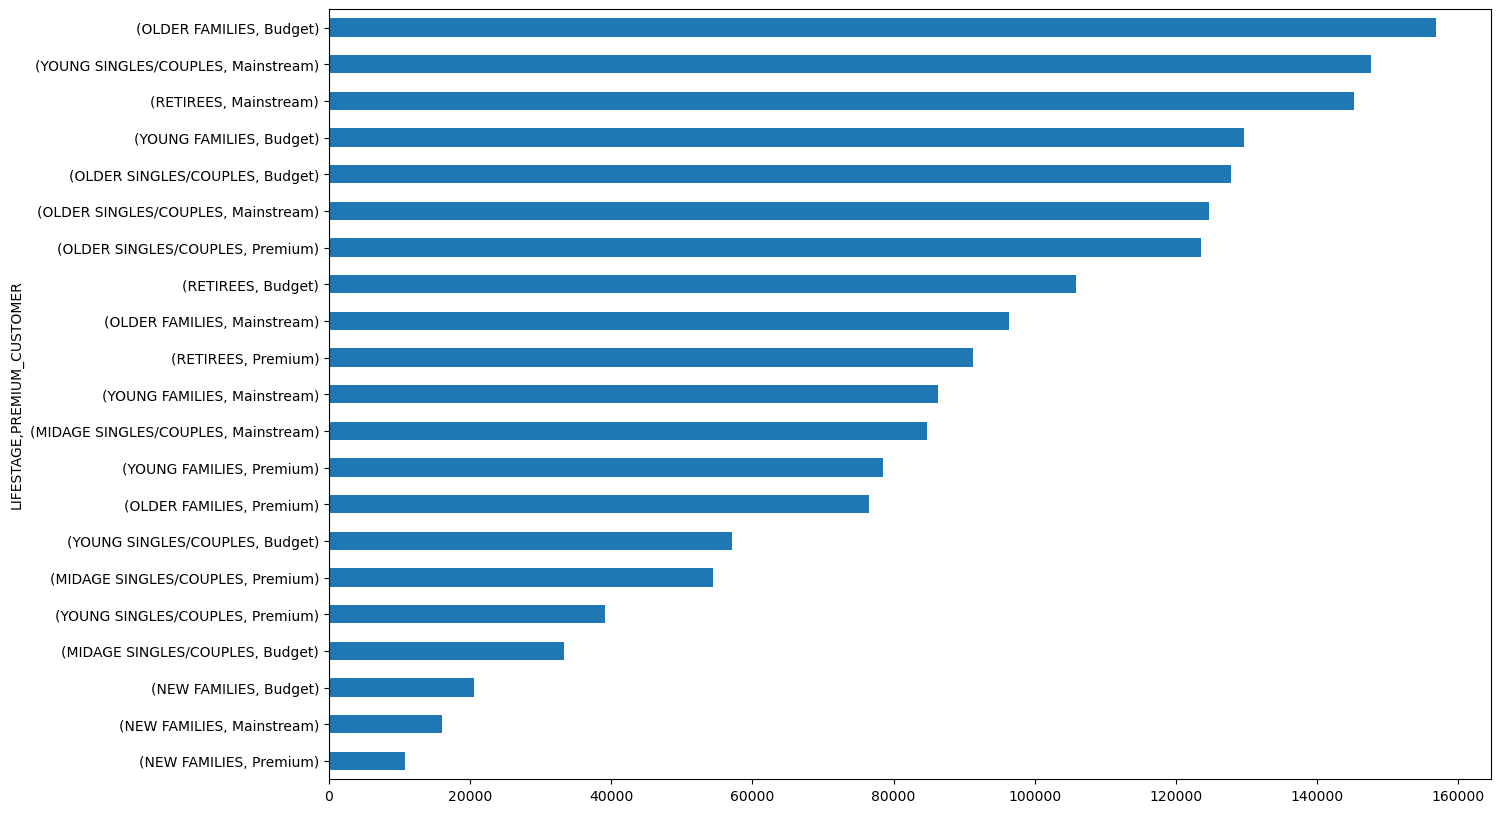

In [101]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(15,10))

In [104]:
stage_agg_prem = merged_df.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


В топ-3 сегмента с общим объемом продаж входят (по порядку):

Семьи пожилого возраста (бюджет) - 156 864 доллара США
Молодые одиночки/семейные пары (основной поток) - 147 582 доллара США
Пенсионеры (основной поток) - 145 169 долларов США

In [106]:
unique_cust = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2232
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

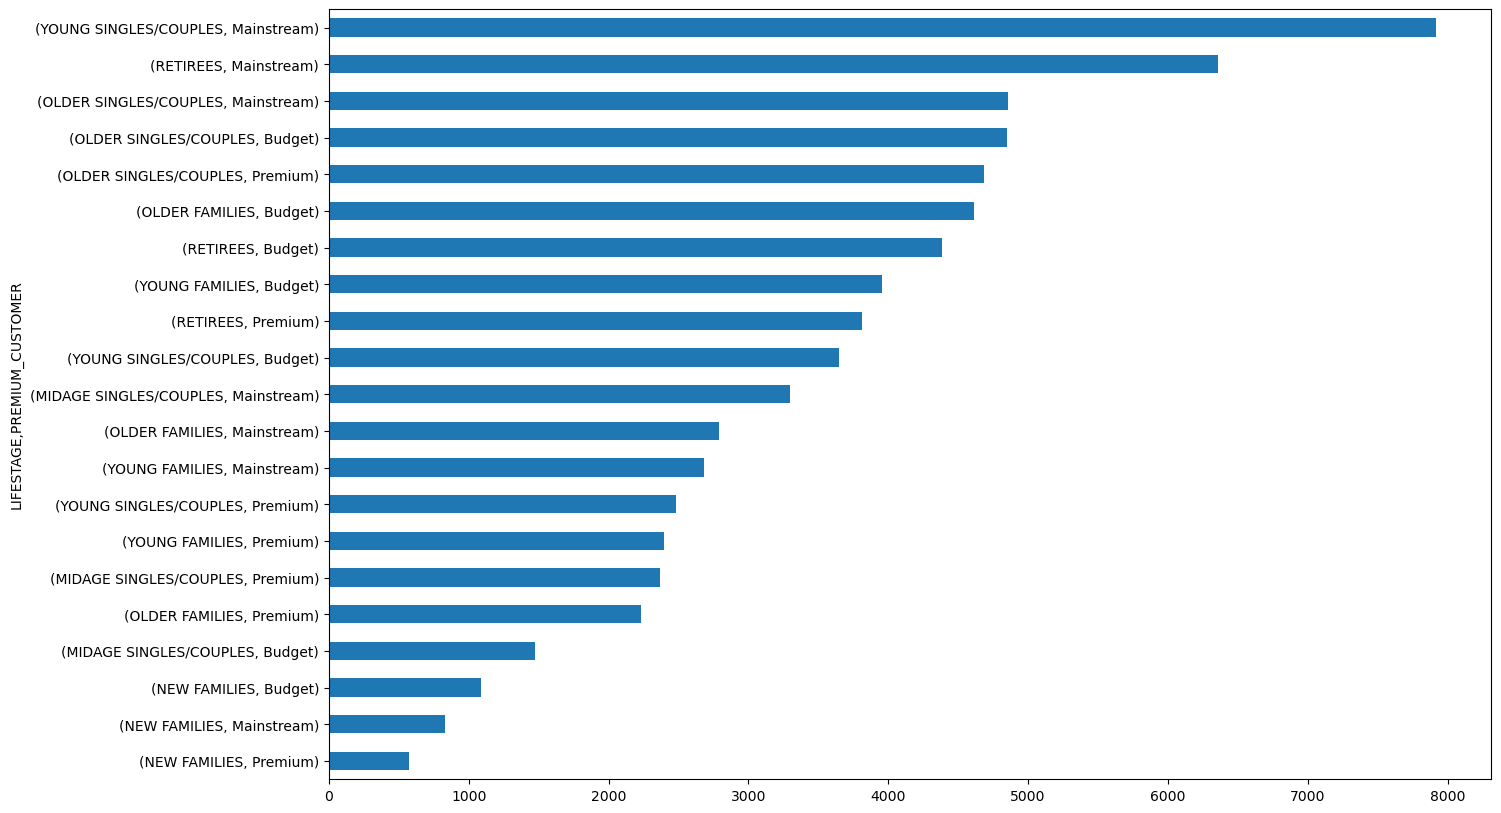

In [107]:

unique_cust.sort_values().plot.barh(figsize=(15,10))

In [119]:
#Средняя цена  за транзакцию по сегментам
temp = merged_df.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).agg({'Unit_Price': 'mean'}).sort_values(by='Unit_Price', ascending=False).rename(columns={'Unit_Price': 'mean_price'})

,mean_price
Segment,
YOUNG SINGLES/COUPLES - Mainstream,4.065642
MIDAGE SINGLES/COUPLES - Mainstream,3.994241
RETIREES - Budget,3.924404
RETIREES - Premium,3.920942
NEW FAMILIES - Budget,3.917688
NEW FAMILIES - Mainstream,3.916133
OLDER SINGLES/COUPLES - Premium,3.893182
OLDER SINGLES/COUPLES - Budget,3.882096
NEW FAMILIES - Premium,3.872110


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


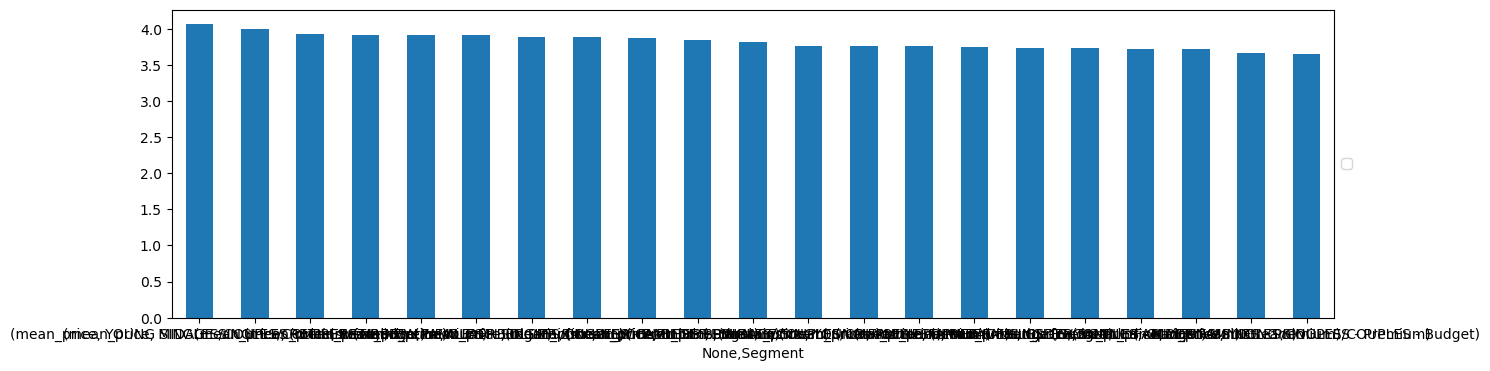

In [124]:
temp.groupby(["Segment"]).agg({'Unit_Price': 'mean'}).sort_values(by='Unit_Price', ascending=False).rename(columns={'Unit_Price': 'mean_price'}).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

Самые высокие средние траты на покупку совершают люди среднего возраста и молодые "Одиночки/семейные пары". Разница между их основной и неосновной группами может показаться незначительной (7,6 против 6,6), но мы выясним, является ли эта разница статистически значимой.

In [127]:
from scipy.stats import ttest_ind
mainstream = merged_df["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_df["PREMIUM_CUSTOMER"] == "Budget") | (merged_df["PREMIUM_CUSTOMER"] == "Premium")

a = merged_df[young_midage & mainstream]["TOT_SALES"]
b = merged_df[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.834645908180742e-237


True

Показатель pval близок к 0. Существует статистически значимая разница в общем объеме продаж между сегментом "Молодежь среднего возраста" и сегментом "Молодежь среднего возраста бюджетного и премиум-класса".

Больше всего одиноких молодых людей/семейных пар (основное население), за ними следуют пенсионеры (основное население). Что объясняет их высокий общий объем продаж.

Несмотря на то, что пожилые семьи не имеют самого большого числа покупателей, они чаще совершают покупки, что способствует их высокому общему объему продаж.

Семьи старшего возраста, за которыми следуют молодые семьи, имеют самое высокое среднее количество чипсов, купленных за одну покупку.

В основной категории "Молодые и средние по возрасту одиночки/семейные пары" больше всего тратят чипсов на покупку. И разница с "Молодыми и средними по возрасту одиночками/семейными парами", не относящимися к основной категории, статистически значима.

Бренд чипсов Kettle доминирует в каждом сегменте как самый покупаемый бренд.

Занимая 2-е место по покупаемости среди брендов, "Молодые люди и пары среднего возраста" являются единственным сегментом, где предпочтения (Doritos) отличаются от предпочтений других (Smiths).

Чаще всего покупают чипсы весом 175 г, за которыми следуют чипсы весом 150 г для всех сегментов.